# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

Read in training data

Split training data into train_set and test_set (you could do this stratified)

Now never touch test_set until end of notebook

Train set used from here

During cross validation train set will be further split into train and val set

TargetDeathRate            1.000000
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0

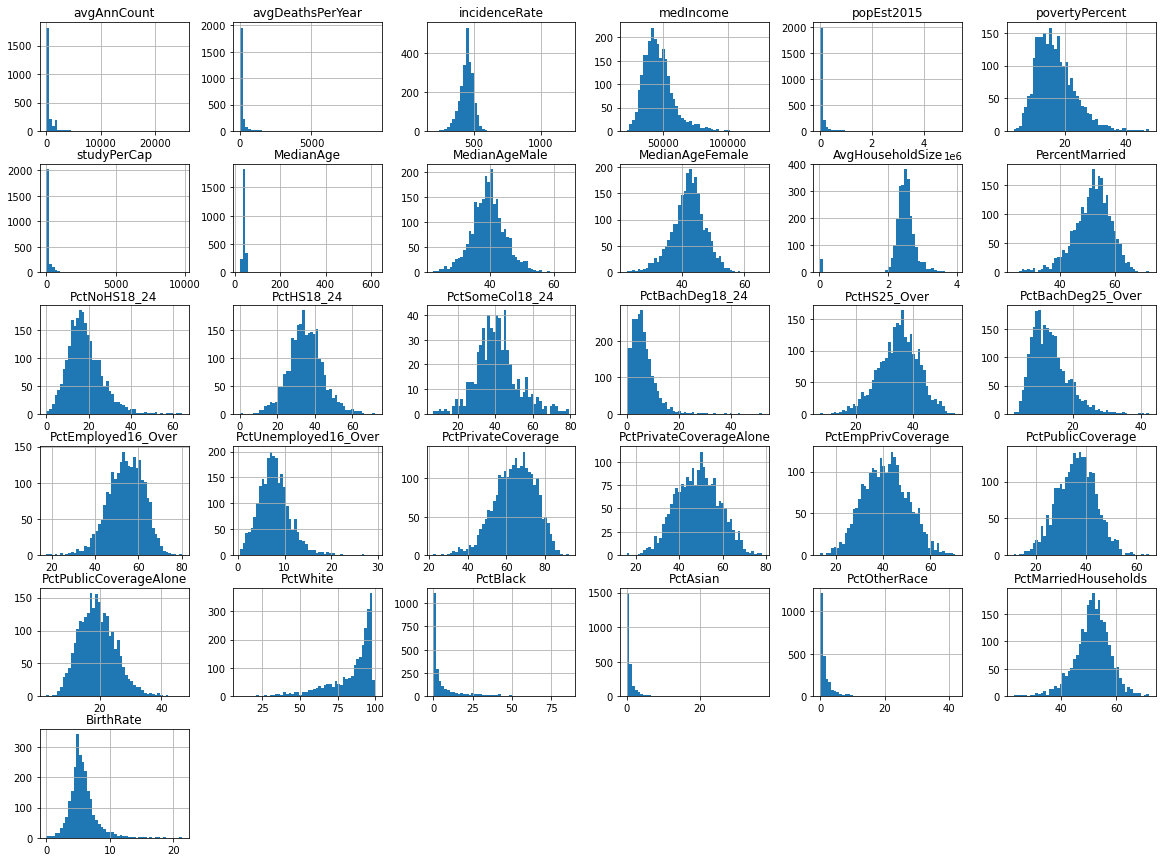

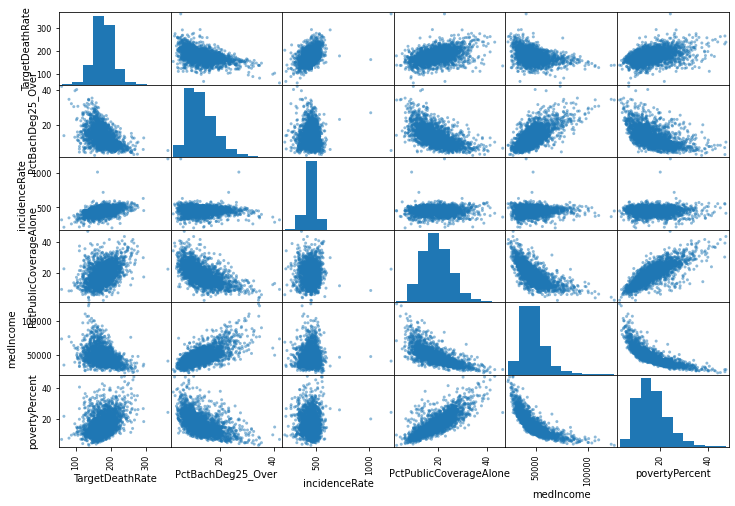

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

data = pd.read_csv(training_data_path) # code to read the data file


# data info() function shows 2438 rows for each column except for PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone
# therefore we have missing data which we would need to impute later on


data.hist(bins=50,figsize=(20,15)) # code to plot histograms of the data 


# comment on unusual values on histogram:
# Median age - The scale of the x-axis of the median age goes up to a few hundreds meaning we have data points
# of ages over 200,300 which are unusual values for age! These outliers are seen in the median age histogram but
# are not seen in the MedianAgeMale and MedianAgeFemale histograms

# Average Household Size - Histogram shows float values near zero for the average number of people living in a household...
# which is ususual as a house should only be a house if you have a minimum of 1 person living in it according to definition 
# Could suggest that some counties have many empty houses, or many houses that are up for sale, which is also unusual!

# Median Income - The histogram shows that most median incomes per county lie at around $40,000-$50,000
# It appears that some counties have median incomes of over $100,000. These are high and can be classed as outliers.

# We also notice an opposite trend in the histograms between the percentage of white residents (PctWhite) and the 
# percentage of other races (PctBlack, PctAsian and PctOtherRace), showing that residents in US counties are 
# predominantly white which might not be suprising but will be discussed when our lasso regression models uses
# these race features to predict the cancer mortality rate

# code to add target variable as extra column
target_data = pd.read_csv(training_targets_path)
data['TargetDeathRate'] = target_data
data.head() # data.head() function shows that we successfully added the target variable as a new column in the dataframe


# Computing correlations between features and target variable
corr_matrix = data.corr()
target_corr = corr_matrix["TargetDeathRate"].sort_values(ascending=False)
print(target_corr)

# Our correlation gives the following ranking:
# 1) incidenceRate 2) PctPublicCoverageAlone 3) povertyPercent 4) pctHS25_Over 5) PctPublic Coverage
# However, the strength of the correlation should be ranked by the absolute values, as a negative correlation
# is just a normal correlation that entails an inverse relationship with the target variable
# Therefore, the top five features with strongest correlations to the targets are:
# 1) PctBachDeg25_Over 
# 2) incidenceRate
# 3) PctPublicCoverageAlone
# 4) medIncome
# 5) povertyPercent

# code to draw scatter matrix for comparison
attributes = ["TargetDeathRate","PctBachDeg25_Over","incidenceRate","PctPublicCoverageAlone","medIncome","povertyPercent"]
scatter_matrix(data[attributes],figsize=(12,8))

# Comment on correlations: 
# medianIncome vs PovertyPercent
# From the correlation matrix, we notice an inverse relationship between the median income and percentage of poverty
# in US counties. This is seen by the curved graph which indicates that the higher the median income is per county,
# the less the percentage of poverty in the county. This makes sense as poverty is a measure of income.

# incidenceRate vs all features in the matrix
# if we look at the relationship between the incidence rate of cancer diagnosis, and the remaining features in the
# matrix, we see a flat line for each plot where data points are widely dispersed. This indicates no relationship between
# incidenceRate and the other variables. This shows that the chances of being diagnosed by cancer does not increase or
# decrease if you have greater income, have government healthcare or have a bachelors degree and you are over 25. 

# PctPublicCoverageAlone vs povertyPercent
# We notice a strong directly proportional relationship between residents who have government-provided health coverage
# as their only health insurance (no private insurance) and the percent of populace in poverty . This is seen by the
# positive diagonal in the graph, indicating that poorer counties have a high number of residents who are fully reliant
# on government-provided healthcare.
# This makes sense as private healthcare tends to be expensive in most countries, including the US.

# Private vs government-provided healthcare with respect to target variable
# If we look at the correlation of these features with the target variable, we see that those with
# government-provided healthcare (PublicCoverage and PublicCoverageAlone) have a strong correlation with the 
# target variable and therefore a higher chance of dying from cancer than those with 
# private health care (PctPrivateCoverage and PctPrivateCoverageAlone)
# This indicates that private healthcare in US counties is much much better than government provided healthcare

print(" ")


# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# we notice some rows have a high number of zeros and empty entries, for example 
num_zeros = (data['studyPerCap'] == 0).sum()
num_blank = (data['PctSomeCol18_24'].isnull()).sum()
print(num_zeros, "zeros in studyPerCap and", num_blank, "blank columns in PctSomeCol18_24 so we need to clean/impute the data!")

# studyPerCap feature has 1548 zeroes, that is more than half the data
# the same goes with PctSomeCol18_24 which has 1829 blank rows
# imputing all this data will not be useful for our model therefore the columns will be removed
reduced_data = data.drop("studyPerCap",axis=1) 
newdata = reduced_data.drop("PctSomeCol18_24",axis=1)


# splitting data into training and test set (80:20) using a random state
train_set, test_set = train_test_split(newdata, test_size= 0.2, random_state=42)
cancer = train_set.drop("TargetDeathRate",axis=1)
cancer_labels = train_set["TargetDeathRate"].copy()

# In our pipeline, we do not need a OneHotEncoder as we do not have a column of strings
# We also do not need a CombinedAttributesAdder as we do not need to add any columns together
# We will therefore use normalization and impute the missing data as methods of pre-processing
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])
cancer_prepared = num_pipeline.fit_transform(cancer)



1548 zeros in studyPerCap and 1829 blank columns in PctSomeCol18_24 so we need to clean/impute the data!


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


				 Ordinary Least Squares (OLS) 			

Training Data Mean Squared Error = 19.007141240059873

--------------------------------------------------------------------------------
Cross Validation on Training Data: 

Scores: [19.76401842 20.1371999  20.04301937 17.38930908 18.07134796 21.5372026
 19.19666306 18.54285925 21.07204607 19.80294502]


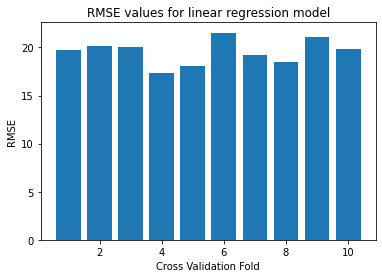

Mean Squared Error Using Cross Validation: 19.555661073367105
Standard deviation: 1.2229926986291357
--------------------------------------------------------------------------------

Testing Data Mean Squared Error = 18.97133132929839
R^2 value = 0.5126150686521979

Result: Mean squared error values from training set and cross validation are less than one standard deviation away from the test mean squared error value. An R squared value of 0.51 indicates reveals that ~50% of the variability  observed in the target variable is explained by the linear regression model


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Keep target death rate in the data frame 
# Steps: split data into train test sets 
# Regression on train sets only. 
# Do cross validation on the train set only
# Use gridsearchCV to identify best hyperparameter
# need small RMSE but also no overfitting

lin_reg=LinearRegression()
lin_reg.fit(cancer_prepared, cancer_labels)

print('\t\t\t\t Ordinary Least Squares (OLS) \t\t\t')

# we use our model to make predictions and calculate the RMSE accordingly
cancer_predictions = lin_reg.predict(cancer_prepared)
lin_mse=mean_squared_error(cancer_labels, cancer_predictions)
lin_rmse=np.sqrt(lin_mse)
print("\nTraining Data Mean Squared Error =", lin_rmse)

# cross validation on linear regression model using training set
scores = cross_val_score(lin_reg, cancer_prepared, cancer_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("\n--------------------------------------------------------------------------------")
print("Cross Validation on Training Data: ")
print('\nScores:',rmse_scores)

# we run the test set through the pipleine and calculate the RMSE using the test set
X_test = test_set.drop("TargetDeathRate",axis=1)
y_test = test_set["TargetDeathRate"].copy()
X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rsme = np.sqrt(final_mse) 

# we plot a bar chart to visualise the RMSE values obtained from cross validation
# Number of fold
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Create a new figure and axes
fig, ax = plt.subplots()
# Add a bar chart for the linear regression RMSE scores 
ax.bar(X, rmse_scores)
# Add labels and title
ax.set_xlabel('Cross Validation Fold')
ax.set_ylabel('RMSE')
ax.set_title('RMSE values for linear regression model')
plt.show()

# Bar chart shows consistency of the RMSE value across each fold and so the error generalizes throughout the dataset

print('Mean Squared Error Using Cross Validation:',rmse_scores.mean())
print('Standard deviation:',rmse_scores.std())
print("--------------------------------------------------------------------------------")
print("\nTesting Data Mean Squared Error =", final_rsme)
# Calculate the R squared value
r2 = lin_reg.score(cancer_prepared, cancer_labels)
print("R^2 value =", r2)
print("\nResult: Mean squared error values from training set and cross validation are less than one standard deviation away from the test mean squared error value. An R squared value of 0.51 indicates reveals that ~50% of the variability  observed in the target variable is explained by the linear regression model")



# From expirementaton, an alpha value of zero in either ridge or lasso model will have results similar to the linear regression model.



				 Lasso Regression Model 			

Suitable regularisation weight = {'alpha': 0.060000000000000005}

Training Data Root Mean Squared Error = 19.033296420968547

--------------------------------------------------------------------------------
Cross Validation on Training Data: 

Scores: [19.60133223 19.89385766 20.19092086 17.36101739 18.12942703 21.39387209
 19.08204431 18.56705665 21.25960545 19.69759642]


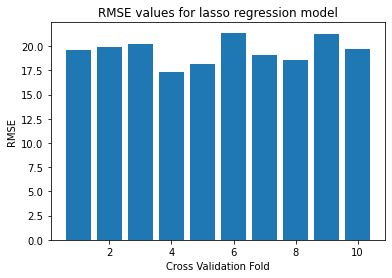

Mean Squared Error Using Cross Validation: 19.517673007386666
Standard deviation: 1.2190338237676164
--------------------------------------------------------------------------------

Testing Data Mean Squared Error = 18.99164570029136
R^2 value = 0.5112727929546872

Result: We note that mean squared error values from training set and cross validation are also less than one 
standard deviation away from the actual value for the Lasso model. We obtain a similar R squared value of 0.51 and we notice a similar trend in the change of RMSE values across each fold of our cross validation dataset


In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(alpha = 0.060000000000000005)
lasso.fit(cancer_prepared, cancer_labels) # fitting lasso on training data

# Using GridCV to identify the best alpha parameter
# we iterate from 0.01 to 50 in increments of 0.01 to identify the best value for alpha, we find that to be 0.060000000000000005
param_grid  = {'alpha': np.arange(0.01,50,0.01)}
grid_search = GridSearchCV(lasso, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search.fit(cancer_prepared, cancer_labels)
grid_search.best_params_ 


print('\t\t\t\t Lasso Regression Model \t\t\t')
print("\nSuitable regularisation weight =", grid_search.best_params_)


# calculating the MSE
cancer_lasso_predictions = lasso.predict(cancer_prepared)
lasso_mse=mean_squared_error(cancer_labels, cancer_lasso_predictions)
lasso_rmse=np.sqrt(lasso_mse)
print("\nTraining Data Root Mean Squared Error =", lasso_rmse)

# cross validation on linear regression model
lasso_scores = cross_val_score(lasso, cancer_prepared, cancer_labels, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)

print("\n--------------------------------------------------------------------------------")
print("Cross Validation on Training Data: ")
print('\nScores:',lasso_rmse_scores)

# we calculate the MSE using Lasso for our test set 
final_lasso_predictions = lasso.predict(X_test_prepared)
final_lasso_mse = mean_squared_error(y_test,final_lasso_predictions)
final_lasso_rsme = np.sqrt(final_lasso_mse) 

# bar chart for the lasso regression RMSE scores 
fig2, ax2 = plt.subplots()
# Add the bar chart
ax2.bar(X, lasso_rmse_scores)
# Add labels and title
ax2.set_xlabel('Cross Validation Fold')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE values for lasso regression model')
plt.show()

# we notice a very similar trend with the RMSE consistency when comparing to the linear RMSE values

print('Mean Squared Error Using Cross Validation:',lasso_rmse_scores.mean())
print('Standard deviation:',lasso_rmse_scores.std())
print("--------------------------------------------------------------------------------")
print("\nTesting Data Mean Squared Error =", final_lasso_rsme)
# Calculate the R squared value for Lasso
r2_lasso = lasso.score(cancer_prepared, cancer_labels)
print("R^2 value =", r2_lasso)
print("\nResult: We note that mean squared error values from training set and cross validation are also less than one ")
print("standard deviation away from the actual value for the Lasso model. We obtain a similar R squared value of 0.51 and we notice a similar trend in the change of RMSE values across each fold of our cross validation dataset")



				 Ridge Regression Model 			

Suitable regularisation weight = {'alpha': 31.970000000000002}

Training Data Root Mean Squared Error = 19.037855771293227

--------------------------------------------------------------------------------
Cross Validation on Training Data: 

Scores: [19.57030551 19.90903012 20.26700503 17.33794727 18.07907911 21.3391337
 19.17612087 18.5960872  21.24330796 19.65233468]


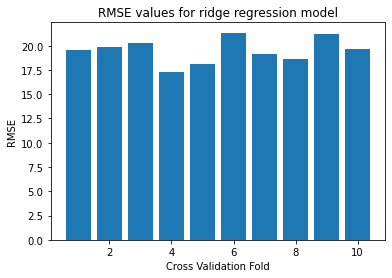

Mean Squared Error Using Cross Validation: 19.517035145635088
Standard deviation: 1.2172850432152216
--------------------------------------------------------------------------------

Testing Data Mean Squared Error = 18.9902399335679
R^2 value = 0.5110386195999035

Result: Similarly, all RMSE values are less than one standard deviation from the final RMSE value. We notice a very 
similar trend in the change of RMSE values with slighly less variability in the ridge and lasso models. This is 
seen by the scale of the y-axis.


In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 31.970000000000002)
ridge.fit(cancer_prepared, cancer_labels) # fitting ridge on a the training set

# Using GridCV to identify the best alpha parameter, which turns out to be 31.970000000000002
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search_ridge.fit(cancer_prepared, cancer_labels)

print('\t\t\t\t Ridge Regression Model \t\t\t')
print("\nSuitable regularisation weight =", grid_search_ridge.best_params_)

# calculating the MSE
cancer_ridge_predictions = ridge.predict(cancer_prepared)
ridge_mse = mean_squared_error(cancer_labels, cancer_ridge_predictions)
ridge_rmse=np.sqrt(ridge_mse)
print("\nTraining Data Root Mean Squared Error =", ridge_rmse)

# cross validation on ridge regression model
ridge_scores = cross_val_score(ridge, cancer_prepared, cancer_labels, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

print("\n--------------------------------------------------------------------------------")
print("Cross Validation on Training Data: ")
print('\nScores:',ridge_rmse_scores)

# we calculate the MSE using the Ridge model for our test set 
final_ridge_predictions = ridge.predict(X_test_prepared)
final_ridge_mse = mean_squared_error(y_test,final_ridge_predictions)
final_ridge_rsme = np.sqrt(final_ridge_mse) 

# bar chart for the ridge regression RMSE scores
fig3, ax3 = plt.subplots()
# Add the bar chart
ax3.bar(X, ridge_rmse_scores)
# Add labels and title
ax3.set_xlabel('Cross Validation Fold')
ax3.set_ylabel('RMSE')
ax3.set_title('RMSE values for ridge regression model')
plt.show()

print('Mean Squared Error Using Cross Validation:',ridge_rmse_scores.mean())
print('Standard deviation:',ridge_rmse_scores.std())
print("--------------------------------------------------------------------------------")
print("\nTesting Data Mean Squared Error =", final_ridge_rsme)
# Calculate the R squared value for the Ridge Model
r2_ridge = ridge.score(cancer_prepared, cancer_labels)
print("R^2 value =", r2_ridge)
print("\nResult: Similarly, all RMSE values are less than one standard deviation from the final RMSE value. We notice a very ")
print("similar trend in the change of RMSE values with slighly less variability in the ridge and lasso models. This is ")
print("seen by the scale of the y-axis.")


# Another conclusion: Cross validation ones are randomly picked so Lasso and Ridge are better, protect against overfitting.
# Whereas the original data set has imputed values

				Model Comparison 			
Ranking from best to worst: 

		Cross Validation Root Mean Squared Errors: 

(1) Ridge RMSE: 19.517035145635088
(2) Lasso RMSE: 19.517673007386666
(3) Linear RMSE: 19.555661073367105

		Root Mean Squared Errors from Training Set: 

(1) Linear RMSE: 19.007141240059873
(2) Lasso RMSE: 19.033296420968547
(3) Ridge RMSE: 19.037855771293227

		Root Mean Squared Errors from Test Set: 

(1) Linear RMSE: 18.97133132929839
(2) Ridge RMSE: 18.9902399335679
(3) Lasso RMSE: 18.99164570029136

We notice that for all models, the RMS error values from the training set were bigger than the error values from 
the test set. This indicates slight under fitting of the data.

		R Squared values from each Model: 

(1) Ridge R^2: 0.5110386195999035
(2) Lasso R^2: 0.5112727929546872
(3) Linear R^2: 0.5126150686521979

An R squared value of ~0.50 indicates that half of the target variable variance is explained by the model's 
features/predictors. 

		Visualizing Model Perfomance using 

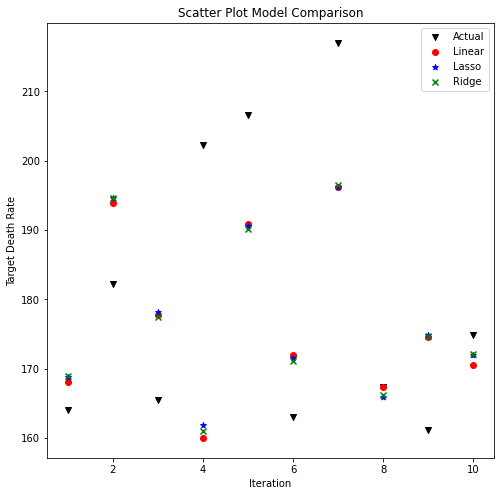

All three models behave very similarly in predicting the target variables. In most cases, the linear and ridge 
models outpreform the lasso model in making target predictions whilst ensuring a smaller error. Ridge was deemed 
the better model out of the three due to better cross validation performance which gives better understanding of 
model performance over the dataset instead of just a single train/test split. Ridge also had the lowest R^2 value,
hence our result.


In [7]:
# Comparing all regression models:

print("\t\t\t\tModel Comparison \t\t\t")
print("Ranking from best to worst: ")
print("\n\t\tCross Validation Root Mean Squared Errors: \n")
print("(1) Ridge RMSE:", ridge_rmse_scores.mean())
print("(2) Lasso RMSE:", lasso_rmse_scores.mean())
print("(3) Linear RMSE:", rmse_scores.mean())
print("\n\t\tRoot Mean Squared Errors from Training Set: \n")
print("(1) Linear RMSE:", lin_rmse)
print("(2) Lasso RMSE:", lasso_rmse)
print("(3) Ridge RMSE:", ridge_rmse)
print("\n\t\tRoot Mean Squared Errors from Test Set: \n")
print("(1) Linear RMSE:", final_rsme)
print("(2) Ridge RMSE:", final_ridge_rsme)
print("(3) Lasso RMSE:", final_lasso_rsme)
print("\nWe notice that for all models, the RMS error values from the training set were bigger than the error values from ")
print("the test set. This indicates slight under fitting of the data.")
# it is worth mentioning that when evaluating which model was the best, the results from cross validation were 
# favoured slightly more than the results from training and test sets. This is because cross validation gives 
# better understanding of model performance over the whole dataset instead of just a single train/test split.
print("\n\t\tR Squared values from each Model: \n")
print("(1) Ridge R^2:", r2_ridge)
print("(2) Lasso R^2:", r2_lasso)
print("(3) Linear R^2:", r2)
print("\nAn R squared value of ~0.50 indicates that half of the target variable variance is explained by the model's ")
print("features/predictors. ")
print("\n\t\tVisualizing Model Perfomance using Sample Data:")

# Now we obtain some sample data and let each our three models predict the target variables:
some_data = cancer.iloc[:10]
some_labels=cancer_labels.iloc[:10]
some_data_prepared=num_pipeline.transform(some_data)
y_pred_linreg = lin_reg.predict(some_data_prepared) # Linear regression prediction
y_pred_lasso = lasso.predict(some_data_prepared) # Lasso prediction
y_pred_ridge = ridge.predict(some_data_prepared) # Ridge Prediction

# Scatter Plot
plt.figure(figsize = (8, 8))
plt.title('Scatter Plot Model Comparison')
plt.xlabel('Iteration')
plt.ylabel('Target Death Rate')
plt.scatter(X, some_labels, marker='v', color='black', label='Actual')
plt.scatter(X, y_pred_linreg, marker='o', color='r', label='Linear')
plt.scatter(X, y_pred_lasso, marker='*', color='b', label='Lasso')
plt.scatter(X, y_pred_ridge, marker='x', color='g', label='Ridge')
plt.legend()
plt.show()

print("All three models behave very similarly in predicting the target variables. In most cases, the linear and ridge ")
print("models outpreform the lasso model in making target predictions whilst ensuring a smaller error. Ridge was deemed ")
print("the better model out of the three due to better cross validation performance which gives better understanding of ")
print("model performance over the dataset instead of just a single train/test split. Ridge also had the lowest R^2 value,")
print("hence our result.")


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

We recall the suitable regularisation weight of the Lasso model: Lasso(alpha=0.060000000000000005)

Below are the coefficient weights of the lasso model used to predict the target variable: 

 [-4.21351614  6.08462305 10.06816553  0.24049898 -2.47899797  0.56128089
 -0.14996031 -3.01611379 -0.11660471  0.          5.70766553 -0.85622351
  1.97723247  0.04817674  2.10625995 -7.40323321 -2.8214885   0.05713703
 -6.10224951  0.56823987  2.60123425 -0.94383562  1.55353801 -2.214917
 -1.63309312  0.25194417 -3.2724662  -6.22789995 -1.97214023]

The higher the absolute coefficient value, the more important the feature is in predicting the target variable 
Therefore, the 5 most important features in the lasso regression model are: 

Feature: incidenceRate, Coefficient: 10.068165531856343
Feature: PctBachDeg25_Over, Coefficient: 7.4032332060008565
Feature: PctMarriedHouseholds, Coefficient: 6.227899954184983
Feature: PctPrivateCoverage, Coefficient: 6.102249508497642
Feature: avgDeathsPerYear,

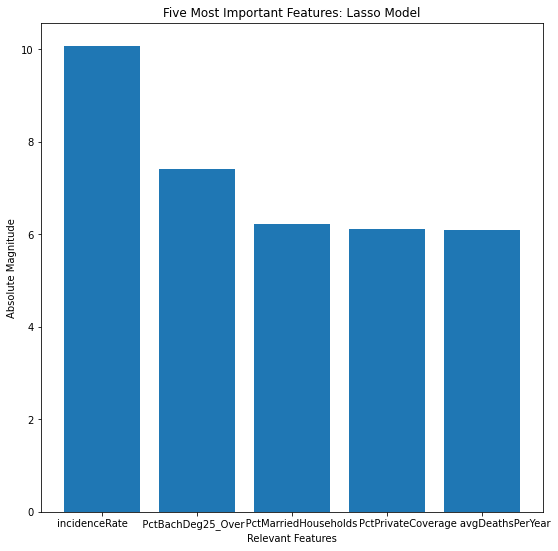

As seen by the bar chart, the lasso model puts greater emphasis on the five aformentioned features to predict
the target variable. Incidence Rate is the most important feature in predicting the outcome, with a weigthing that
is nearly double the other features. Using the correlations with the target variable computed in exercise 1, we
realize that incidenceRate and PctBachDeg25_Over indeed do have a strong correlation with the target variable.
However, the other three features have relatively low correlation with the target variable. This is one of the 
limitations of the lasso model as it is prone to error by assigning high weightings to not very relevant features.


Further Analysis: Race Features

It is interesting to look at how the lasso model assigns weighting to the 4 race features as seen below: 

Feature: PctOtherRace, Coefficient: 3.27246619887957
Feature: PctAsian, Coefficient: 0.25194416701310896
Feature: PctBlack, Coefficient: 1.6330931156460073
Feature: PctWhite, Coeffici

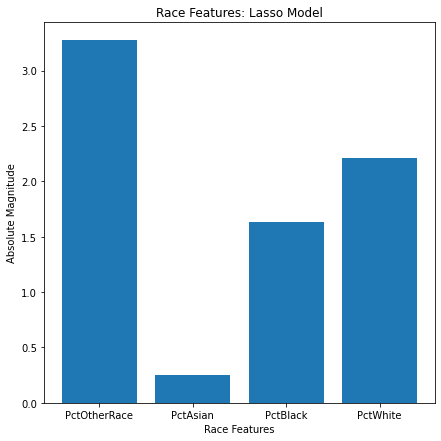

In exercise 1, we discussed how the histograms showed that the vast majority of residents living in US counties
were white, with relatively small percentages of residents from other races. Our analysis shows us that the lasso 
model predicts the target variable using higher weightings of the PctOtherRace, than PctWhite and gives high 
weights to other race features like PctBlack. Therefore, the lasso model predicts the target variable using race 
data that is not representative of the majority race in most US counties. This is another limitation of the lasso   model.


In [61]:
# We have tuned our Lasso model by selecting a suitable regularisation weight in the last question

lasso_model = grid_search.best_estimator_
print("We recall the suitable regularisation weight of the Lasso model:",lasso_model)

# .coef_ gives the weights you multiply each feature by to compute the target variable. The features that
# correspond to the largest coefficients are the most important/relevant features according to the lasso model.
coef = lasso_model.coef_
print("\nBelow are the coefficient weights of the lasso model used to predict the target variable: \n\n", coef)

# we notice that the lasso model has set the coefficients of some features to zero (or very close to zero) 
# meaning the model has not considered these features to predict the target variable
# Some features have negative coefficients, this means that as the feature/estimator value increases, 
# the target variables tends to decrease.

# we use the absolute values of the features for ranking
coef = abs(coef)
# Sort the coefficients in descending order and select the top five
top_five = coef.argsort()[-5:][::-1]

# Get the feature names from the original dataset
feature_names = cancer.columns
    
print("\nThe higher the absolute coefficient value, the more important the feature is in predicting the target variable ")
print("Therefore, the 5 most important features in the lasso regression model are: \n")

# Iterate through the top five sorted coefficients and print the corresponding feature names and coefficients
for i in top_five:
    print(f'Feature: {feature_names[i]}, Coefficient: {coef[i]}')
    

# bar chart showing which features were the most relevant in the lasso model: 
plt.figure(figsize = (9, 9))
plt.title('Five Most Important Features: Lasso Model')
plt.xlabel('Relevant Features')
plt.ylabel('Absolute Magnitude')
# spaces to ensure axis labels are visible
x_axis = ["incidenceRate      ", "           PctBachDeg25_Over             ", "                     PctMarriedHouseholds               ", "                PctPrivateCoverage   ", "               avgDeathsPerYear"]
y_axis = [coef[2], coef[15], coef[27], coef[18], coef[1]]
plt.bar(x_axis,y_axis)
plt.show()

print("As seen by the bar chart, the lasso model puts greater emphasis on the five aformentioned features to predict")
print("the target variable. Incidence Rate is the most important feature in predicting the outcome, with a weigthing that")
print("is nearly double the other features. Using the correlations with the target variable computed in exercise 1, we")
print("realize that incidenceRate and PctBachDeg25_Over indeed do have a strong correlation with the target variable.")
print("However, the other three features have relatively low correlation with the target variable. This is one of the ")
print("limitations of the lasso model as it is prone to error by assigning high weightings to not very relevant features.")

print("\n\nFurther Analysis: Race Features")
print("\nIt is interesting to look at how the lasso model assigns weighting to the 4 race features as seen below: \n")

# Iterate to get the race features
for i in range(4):
    print(f'Feature: {feature_names[26-i]}, Coefficient: {coef[26-i]}')

# bar chart showing race features 
plt.figure(figsize = (7, 7))
plt.title('Race Features: Lasso Model')
plt.xlabel('Race Features')
plt.ylabel('Absolute Magnitude')
x_axis = ["PctOtherRace", "PctAsian", "PctBlack", "PctWhite"]
y_axis = [coef[26], coef[25], coef[24], coef[23]]
plt.bar(x_axis,y_axis)
plt.show()

print("In exercise 1, we discussed how the histograms showed that the vast majority of residents living in US counties")
print("were white, with relatively small percentages of residents from other races. Our analysis shows us that the lasso ")
print("model predicts the target variable using higher weightings of the PctOtherRace than PctWhite and gives high ")
print("weights to other race features like PctBlack. Therefore, the lasso model predicts the target variable using race ")
print("data that is not representative of the majority race in most US counties. This is another limitation of the lasso   model.")

# If I were to approach this differently, I would combine the PctOtherRace, PctAsian and PctBlack features into a single "OtherRace"
# column from the dataset and investigate what other features will be prioritized by the lasso model. 
# That way, the lasso model would use other features to predict the target variable. The model could end up prioritizing the 
# PctWhite feature instead of the added OtherRace column, which is representative of the majority race in most US counties.




# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

				 Random Forest Regression Model 			
Best Identified Parameters for the Random Forest Regression Model:  {'max_features': 8, 'n_estimators': 100}

Training Data Root Mean Squared Error =  6.957106131954725

Cross Validation on Training Data: 

Scores: [17.89790204 19.17132637 20.58399431 16.66739125 17.98316221 19.58529733
 19.64580647 18.30954368 19.33327338 18.91909614]


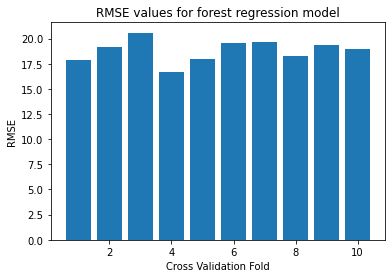

Mean Squared Error Using Cross Validation: 18.809679318064514
Standard deviation: 1.0592355324075016

Testing Data Mean Squared Error = 19.720266595311635

The random forest regression model gives a small RMSE value of around 7, but when we do cross validation,
we get an error that is not far from the RMSE values obtained from the other models. This shows that our random
forest model is overfitting to the training data, hence why cross validation is so important to evaluate regression
models. We notice greater fluctuation in the change of RMSE values in the random forest model when compared to
the other models, as per the bar chart. This shows that the error does not generalize throughout the data set.
Now that we know how the random forest model looks like, we can compare with the chosen model from exercise 3, the ridge regression model.
--------------------------------------------------------------------------------------------------------------
				Model Comparison: Random Forest vs

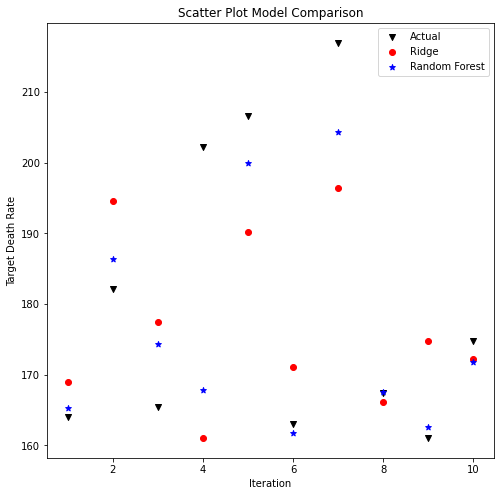


It is evident that the random forest model performs much better than the ridge model in predicting target
variables that are close to the actual target value. This is seen with all of the points in the plot. Thus
the random forest model has greater accuracy in prediction. Furthermore, the random forest model has shown better 
cross validation results than all the other models despite overfitting to the training data. Therefore, the random
forest model is the best performing regression model.


In [9]:
from sklearn.ensemble import RandomForestRegressor

# fitting the model with the best parameter combinations from the gridCV below
forest_reg = RandomForestRegressor(max_features = 8, n_estimators = 100)
forest_reg.fit(cancer_prepared, cancer_labels)
print('\t\t\t\t Random Forest Regression Model \t\t\t')

# Using GridCV to identify the best parameter combinations for the random forest model
param_grid  = [{'n_estimators': [1,5,10,100],'max_features':[2, 4, 6, 8]}, 
               {'bootstrap': [False],'n_estimators':[1,5,10],'max_features':[2,3,4,5]}]

grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search_forest.fit(cancer_prepared, cancer_labels)
print("Best Identified Parameters for the Random Forest Regression Model: ", grid_search_forest.best_params_)

forest_predictions = forest_reg.predict(cancer_prepared)
forest_mse = mean_squared_error(cancer_labels, forest_predictions)
forest_rsme = np.sqrt(forest_mse)
print("\nTraining Data Root Mean Squared Error = ", forest_rsme)

# Carrying out cross validation on the random forest model
forest_scores=cross_val_score(forest_reg, cancer_prepared, cancer_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

print("\nCross Validation on Training Data: ")
print('\nScores:',forest_rmse_scores)

# we calculate the MSE using the forest model for our test set 
final_forest_predictions = forest_reg.predict(X_test_prepared)
final_forest_mse = mean_squared_error(y_test,final_forest_predictions)
final_forest_rsme = np.sqrt(final_forest_mse) 


# bar chart for the ridge regression RMSE scores
fig4, ax4 = plt.subplots()
# Add the bar chart
ax4.bar(X, forest_rmse_scores)
# Add labels and title
ax4.set_xlabel('Cross Validation Fold')
ax4.set_ylabel('RMSE')
ax4.set_title('RMSE values for forest regression model')
plt.show()

print('Mean Squared Error Using Cross Validation:',forest_rmse_scores.mean())
print('Standard deviation:',forest_rmse_scores.std())
print("\nTesting Data Mean Squared Error =", final_forest_rsme)

print("\nThe random forest regression model gives a small RMSE value of around 7, but when we do cross validation,")
print("we get an error that is not far from the RMSE values obtained from the other models. This shows that our random")
print("forest model is overfitting to the training data, hence why cross validation is so important to evaluate regression")
print("models. We notice greater fluctuation in the change of RMSE values in the random forest model when compared to")
print("the other models, as per the bar chart. This shows that the error does not generalize throughout the data set.")
print("Now that we know how the random forest model looks like, we can compare with the chosen model from exercise 3, the ridge regression model.")
print("--------------------------------------------------------------------------------------------------------------")

print('\t\t\t\tModel Comparison: Random Forest vs Ridge Regression Model \t\t\t')
print("Ranking from best to worst: ")
print("\n\t\tCross Validation Root Mean Squared Errors: \n")
print("(1) Random Forest RMSE:", forest_rmse_scores.mean())
print("(2) Ridge RMSE:", ridge_rmse_scores.mean())
print("\n\t\tRoot Mean Squared Errors from Training Set: \n")
print("(1) Random Forest RMSE:", forest_rsme)
print("(2) Ridge RMSE:", ridge_rmse)
print("\n\t\tRoot Mean Squared Errors from Test Set: \n")
print("(1) Ridge RMSE:", final_ridge_rsme)
print("(2) Random Forest RMSE:", final_forest_rsme)

# Predicting the target variable using the ridge and the random forest model
some_data = cancer.iloc[:10]
some_labels=cancer_labels.iloc[:10]
some_data_prepared=num_pipeline.transform(some_data)
y_pred_ridge = ridge.predict(some_data_prepared) # Ridge Prediction
y_pred_forest = forest_reg.predict(some_data_prepared) # Random Forest Prediction

# Scatter Plot
plt.figure(figsize = (8, 8))
plt.title('Scatter Plot Model Comparison')
plt.xlabel('Iteration')
plt.ylabel('Target Death Rate')
plt.scatter(X, some_labels, marker='v', color='black', label='Actual')
plt.scatter(X, y_pred_ridge, marker='o', color='r', label='Ridge')
plt.scatter(X, y_pred_forest, marker='*', color='b', label='Random Forest')
plt.legend()
plt.show()

print("\nIt is evident that the random forest model performs much better than the ridge model in predicting target")
print("variables that are close to the actual target value. This is seen with all of the points in the plot. Thus")
print("the random forest model has greater accuracy in prediction. Furthermore, the random forest model has shown better ")
print("cross validation results than all the other models despite overfitting to the training data. Therefore, the random")
print("forest model is the best performing regression model.")



				Model Comparison: Most Relevant Features 			

We recall the top five most relevant features of the lasso model: 
1) BirthRate with a weight of 1.9721402262772638
2) avgAnnCount with a weight of -4.213516143720922
3) avgDeathsPerYear with a weight of -6.084623048037333
4) incidenceRate with a weight of -10.068165531856343
5) PctMarriedHouseholds with a weight of 6.227899954184983

We first obtain the coefficients of the random forrest model: 
[0.02382261 0.03489561 0.14379981 0.04884519 0.0242867  0.04464003
 0.0045616  0.01564938 0.01482341 0.01746112 0.01990108 0.02378643
 0.01840004 0.02329097 0.00541042 0.01630824 0.06171407 0.10024712
 0.03802547 0.03012271 0.03699998 0.01330181 0.01450075 0.01912026
 0.06463779 0.02188266 0.02646628 0.01801891 0.03259634 0.02491081
 0.01757242]

We then generate the top five most relevant features of the random forest model: 
1) incidenceRate with a weight of 0.14379980589933
2) PctBachDeg25_Over with a weight of 0.016308236439009246
3) medInc

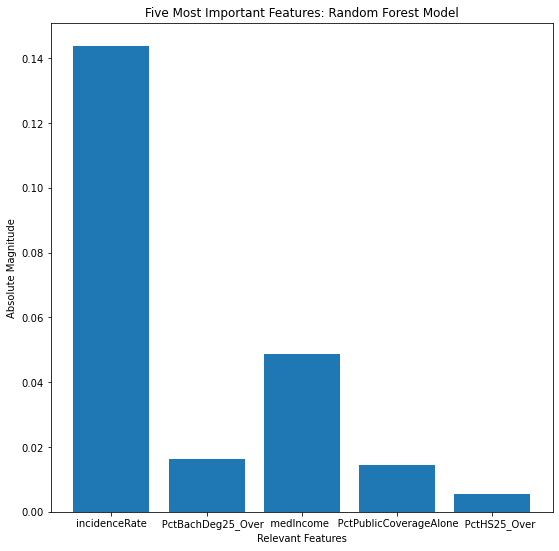

We can see that the random forest model prioritizes features differently than the lasso model. This is because
the random forest model selects random samples from the training data, and creates multiple decision trees which 
are then merged together to make a final prediction. This explains why none of the features were given zero
weighting when predicting the target variables, which can be seen in the coefficient array. The lasso model gave
high weightings to some features and cancels some features by changing their weight to zero. We discussed how
the lasso model did not prioritize all features that related closely to the target variable hence the poorer 
perfomance. The random forest model, on the other hand, prioritized four of the top five features that relate most 
to the target variable. This is why the random forest model was able to give better predictions in the scatter plot
when compared to the ridge model, and all the other models, and is also why it is the chosen model. 


In [66]:
print('\t\t\t\tModel Comparison: Most Relevant Features \t\t\t')
print("\nWe recall the top five most relevant features of the lasso model: ")
print("1)", cancer.columns[28], "with a weight of", coef[28])
print("2)", cancer.columns[0], "with a weight of", -coef[0]) # negative coefficients have a negative in front of them
print("3)", cancer.columns[1], "with a weight of", -coef[1]) # as we are comparing the absolute values
print("4)", cancer.columns[2], "with a weight of", -coef[2])
print("5)", cancer.columns[27], "with a weight of", coef[27])

# Generating most important features for random forest model
importances = forest_reg.feature_importances_
print("\nWe first obtain the coefficients of the random forrest model: ")
print(importances)
print("\nWe then generate the top five most relevant features of the random forest model: ")
print("1)", cancer.columns[2], "with a weight of", importances[2])
print("2)", cancer.columns[15], "with a weight of", importances[15])
print("3)", cancer.columns[3], "with a weight of", importances[3])
print("4)", cancer.columns[22], "with a weight of", importances[22])
print("5)", cancer.columns[14], "with a weight of", importances[14])

# bar chart showing which features were the most relevant in the random forest model: 
plt.figure(figsize = (9, 9))
plt.title('Five Most Important Features: Random Forest Model')
plt.xlabel('Relevant Features')
plt.ylabel('Absolute Magnitude')
x_axis = ["incidenceRate", "      PctBachDeg25_Over  ", "   medIncome    ", "     PctPublicCoverageAlone    ", "     PctHS25_Over"]
y_axis = [importances[2],importances[15], importances[3], importances[22], importances[14]]
plt.bar(x_axis,y_axis)
plt.show()

print("We can see that the random forest model prioritizes features differently than the lasso model. This is because")
print("the random forest model selects random samples from the training data, and creates multiple decision trees which ")
print("are then merged together to make a final prediction. This explains why none of the features were given zero")
print("weighting when predicting the target variables, which can be seen in the coefficient array. The lasso model gave")
print("high weightings to some features and cancels some features by changing their weight to zero. We discussed how")
print("the lasso model did not prioritize all features that related closely to the target variable hence the poorer ")
print("perfomance. The random forest model, on the other hand, prioritized four of the top five features that relate most ")
print("to the target variable. This is why the random forest model was able to give better predictions in the scatter plot")
print("when compared to the ridge model, and all the other models, and is also why it is the chosen model. ")



# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [67]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

# Using the whole of training and target files to re-train the random forest model
training_data = data.drop("TargetDeathRate",axis=1)
targets = pd.read_csv(training_targets_path) # code to read the targets file

# Need to run the training data through the pipeline before we are able to fit our model
cancer_prepared = num_pipeline.fit_transform(training_data)

forest_reg = RandomForestRegressor(max_features = 8, n_estimators = 100)
forest_reg.fit(cancer_prepared, targets.values.ravel())

# Calculating RMSE for training set as before
model_predictions = forest_reg.predict(cancer_prepared)
MSE = mean_squared_error(targets, model_predictions)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error Using Training Data = ", RMSE)
# Despite overfitting, we saw that the random forest model reacts better than other models with unseen data

# Let us test our model with the test data
# First we fit the test data through the pipeline to impute and normalize
testing_data = num_pipeline.fit_transform(test_data)
# Now we predict using our trained random forest model
final_predictions = forest_reg.predict(testing_data)
print("\nRoot Mean Squared Error of Unseen Test Data = ", np.sqrt(mean_squared_error(test_targets,final_predictions)))



Root Mean Squared Error Using Training Data =  6.945782661866841

Root Mean Squared Error of Unseen Test Data =  20.130319841804145
